# Graph

## Init

In [2]:
"""
jupyter nbconvert --to markdown test.ipynb --output README.md

<div align="center">
<img src="img/" alt="rec" width="900px">
</div> 
"""
from __future__ import annotations
import os
import pickle
import pandas as pd

from collections import defaultdict, deque
from typing import List, DefaultDict, Deque, Dict
from pandas import DataFrame
AdjacencyList = DefaultDict[str, List[str]]
Levels = List[List[Dict]]

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf = inf[(inf.level_no != 4)]  # & (inf.level_no != 0)

def add_to_pickle(path, item):
    with open(path, 'wb') as file:
        pickle.dump(item, file, pickle.HIGHEST_PROTOCOL)


def read_from_pickle(path):
    with open(path, 'rb') as file:
        return pickle.load(file)


## Test

### visualization

#### v1

In [7]:
from netgraph import Graph
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
# set_matplotlib_formats('svg')

In [24]:
import pandas as pd
gtest = pd.read_csv('data/info/graph.csv')
gtest.shape


(18, 5)

In [25]:
unq_edges = [[u, v] for u, v in gtest[['parent_paper_uuid', 'uuid']].values]
unq_edges[:5]


[[-1, 1], [1, 2], [1, 3], [1, 4], [3, 6]]

In [26]:
from random import randbytes
def getRandomColor():
    return f"#{randbytes(3).hex()}"
getRandomColor()

'#a5b16f'

In [27]:
uid_to_node_label = {}
for i, row in gtest.iterrows():
	uuid = row['uuid']
	name = row['name']
	uid_to_node_label[uuid] = f"{name}:{uuid}"
print(uid_to_node_label)
		


{1: 'A:1', 2: 'B:2', 3: 'C:3', 4: 'D:4', 6: 'E:6', 7: 'F:7', 8: 'G:8', 10: 'G:10', 5: 'I:5', 9: 'I:9', 11: 'I:11', 14: 'J:14', 15: 'J:15', 16: 'J:16', 12: 'J:12', 17: 'J:17', 18: 'J:18', 19: 'J:19'}


In [28]:
nodes = gtest['name'].unique().tolist()
nodes

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J']

In [29]:
"A(1)".find('B')

-1

In [30]:
# nodes_color = []
# for i, node in enumerate(nodes):
# 	nodes_color.append((node, getRandomColor()))
# nodes_color
nodes_color = [('A', '#c967b0'),
('B', '#c64892'),
('C', '#6f29e2'),
('D', '#f572ed'),
('E', '#406315'),
('F', '#531f38'),
('G', '#70dcca'),
('I', '#c4b1e8'),
('J', '#47df16')]
#[('A', '#11aff9'),
# ('B', '#951494'),
# ('C', '#cafd7c'),
# ('D', '#4900dc'),
# ('E', '#990a34'),
# ('F', '#a70bca'),
# ('G', '#7c770d'),
# ('I', '#31c2d7'),
# ('J', '#0319b1')]


In [31]:
uid_color = {}
for k ,v in uid_to_node_label.items():
	for i, x in enumerate(nodes_color):
		if v.find(x[0]) != -1:
			uid_color[k] = x[1]

print(uid_color)


{1: '#c967b0', 2: '#c64892', 3: '#6f29e2', 4: '#f572ed', 6: '#406315', 7: '#531f38', 8: '#70dcca', 10: '#70dcca', 5: '#c4b1e8', 9: '#c4b1e8', 11: '#c4b1e8', 14: '#47df16', 15: '#47df16', 16: '#47df16', 12: '#47df16', 17: '#47df16', 18: '#47df16', 19: '#47df16'}


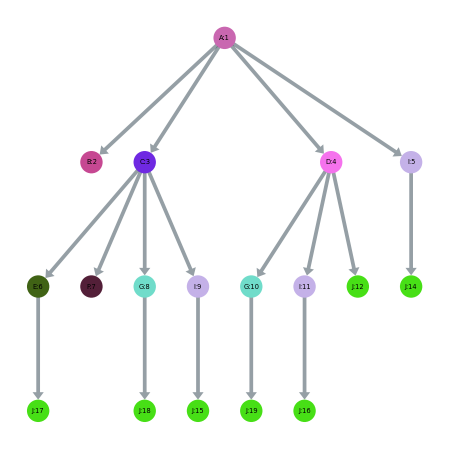

In [32]:
from netgraph import Graph

fig, ax = plt.subplots(figsize=(8,8))
Graph(unq_edges[1:], ax=ax, root="1", node_layout='dot',
      arrows=True, prettify=True, node_width = 4,node_labels=uid_to_node_label, node_color=uid_color, node_edge_width=0
      )
plt.show()


In [33]:
edges = [[u, v] for u, v in gtest[['parent_paper_id', 'paper_id']].values]
edges[:5]

[['-1', 'A'], ['A', 'B'], ['A', 'C'], ['A', 'D'], ['C', 'E']]

In [34]:
nodes_color


[('A', '#c967b0'),
 ('B', '#c64892'),
 ('C', '#6f29e2'),
 ('D', '#f572ed'),
 ('E', '#406315'),
 ('F', '#531f38'),
 ('G', '#70dcca'),
 ('I', '#c4b1e8'),
 ('J', '#47df16')]

In [35]:
# convert to list of tuples to dict
colors = {t[0]:t[1] for t in nodes_color}
colors


{'A': '#c967b0',
 'B': '#c64892',
 'C': '#6f29e2',
 'D': '#f572ed',
 'E': '#406315',
 'F': '#531f38',
 'G': '#70dcca',
 'I': '#c4b1e8',
 'J': '#47df16'}

c:\Users\soiko\anaconda3\lib\site-packages\netgraph\_parser.py:23: UserWarning: Multi-graphs are not properly supported. Duplicate edges are plotted as a single edge; edge weights (if any) are summed.
  warnings.warn(msg)


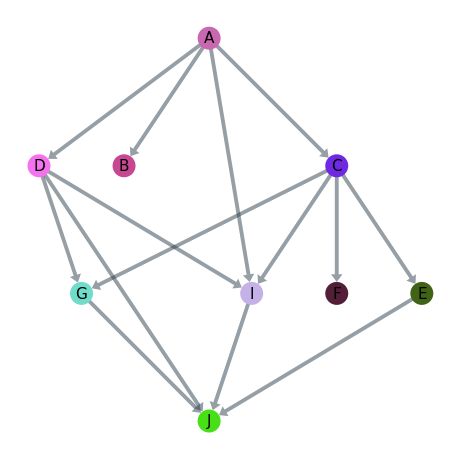

In [36]:
from netgraph import Graph

fig, ax = plt.subplots(figsize=(8, 10))
Graph(edges[1:], ax=ax, root = "A", node_layout='dot', 
      arrows=True, prettify=True, node_labels= True, node_color=colors, node_edge_width=0
      )
plt.show()


#### graph algo

In [37]:
import pandas as pd
from __future__ import annotations
from collections import defaultdict, deque
from typing import List, DefaultDict, Deque, Dict
AdjacencyList = DefaultDict[str, List[str]]
Levels = List[List[Dict]]
from pandas import DataFrame


In [38]:
class GraphManager:
	def __init__(self) -> None:
		self.adjacencyListUnique: AdjacencyList = defaultdict(list)
		self.adjacencyListActual: AdjacencyList = defaultdict(list)
		self.inf: DataFrame|None = None
		

	@classmethod
	def init_from_csv(cls, csv_path: str) -> Graph:
		g = cls()
		g.inf = pd.read_csv(csv_path)
		print(g.inf.shape)
		for _, row in g.inf.iterrows():
			g.addEdge(str(row['parent_paper_uuid']), str(row['uuid']), unique=True)
			g.addEdge(row['parent_paper_id'], row['paper_id'], unique=False)
		return g

	def addEdge(self, parent_paper_uuid: str, child_id: str,unique ) -> None:
		if unique:
			self.adjacencyListUnique[parent_paper_uuid].append(child_id)
		else:
			self.adjacencyListActual[parent_paper_uuid].append(child_id)
		

	def getPaths(self, s, d,unique=True) -> List[List[str]]:
		# Mark all the vertices as not visited
		# visited = {}
		# for i in self.adjacencyListActual:
		# 	visited[i] = False
		# 	for j in self.adjacencyListActual[i]:
		# 		visited[j] = False

		self.path = []
		self.ans = []

		def dfs(root):
			self.path.append(root)
			if root == d:
				if not unique:
					self.ans.append(self.path)
				else:
					self.ans = self.path
				
				return
			if not unique:
				for child in self.adjacencyListActual[root]:
					dfs(child)
						# after finishing traverse the child node, remove it from current path
					self.path = self.path[:-1]
			else:
				for child in self.adjacencyListUnique[root]:
					dfs(child)
						# after finishing traverse the child node, remove it from current path
					self.path = self.path[:-1]
		dfs(s)
		
		return self.ans


gt = GraphManager.init_from_csv('data/info/graph.csv')
print(gt.getPaths('1', '14', unique=True))
print(gt.getPaths('1', '17', unique=True))
print(gt.getPaths('A', 'I', unique=False))
print(gt.getPaths('A', 'J' ,unique=False))


(18, 5)
['1', '5', '14']
['1', '3', '6', '17']
[['A', 'C', 'I'], ['A', 'D', 'I'], ['A', 'I']]
[['A', 'C', 'E', 'J'], ['A', 'C', 'G', 'J'], ['A', 'C', 'G', 'J'], ['A', 'C', 'I', 'J'], ['A', 'C', 'I', 'J'], ['A', 'C', 'I', 'J'], ['A', 'D', 'G', 'J'], ['A', 'D', 'G', 'J'], ['A', 'D', 'I', 'J'], ['A', 'D', 'I', 'J'], ['A', 'D', 'I', 'J'], ['A', 'D', 'J'], ['A', 'I', 'J'], ['A', 'I', 'J'], ['A', 'I', 'J']]


#### Vis main

In [39]:
import pandas as pd
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.shape

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
inf.columns

Index(['uuid', 'paper_id', 'parent_id', 'parent_paper_id', 'title',
       'reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
       'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'freshness_avg',
       'degree_centrality', 'closeness_centrality', 'betweenness_centrality',
       'level_no', 'similarity_with_root', 'similarity_with_immediate_parent'],
      dtype='object')

In [ ]:
inf.drop(['paper_type_label'], axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
inf['paper_type_label'] = le.fit_transform(inf['paper_type'])
inf['paper_type_label'].unique()


array([0, 5, 3, 1, 2, 4])

In [ ]:
def f(p):
	if p == 'Article':
		return 1
	elif p == "Conference Paper":
		return 2
	elif p == "Literature Review":
		return 3
	elif p == "Book":
		return 4
	elif p == "Chapter":
		return 5
	else:
		return np.nan


inf['paper_type_label'] = inf.paper_type.apply(f)
inf['paper_type_label'].unique()


array([ 1., nan,  2.,  4.,  5.,  3.])

In [ ]:
inf[['paper_type', 'paper_type_label']].drop_duplicates()



,paper_type,paper_type_label
0,Article,1.0
1,NaN,NaN
2,Conference Paper,2.0
88,Book,4.0
272,Chapter,5.0
408,Literature Review,3.0


In [ ]:
inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)


In [ ]:
inf.head(3)

,uuid,paper_id,parent_id,parent_paper_id,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,citation_count_min_max_norm,age_min_max_norm,paper_type_label,freshness_avg,degree_centrality,closeness_centrality,betweenness_centrality,level_no,similarity_with_root,similarity_with_immediate_parent
0,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,NaN,NaN,PositionRank: An Unsupervised Approach to Keyp...,43,176,26,2017.0,Article,...,NaN,NaN,NaN,NaN,0.004205,0.000000,0.000000,0,1.000000,NaN
1,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,SemEval-2010 Task 5 : Automatic Keyphrase Extr...,29,352,71,2010.0,NaN,...,0.000506,0.042424,0.76,0.512602,0.004744,0.002620,0.000475,1,0.644213,0.644213
2,be2af112-6c57-4598-9813-d02fff71055b,05dec9ff0f48f45b09245ba0354748961f18ff77,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,Citation-Enhanced Keyphrase Extraction from Re...,61,100,10,2014.0,Conference Paper,...,0.000144,0.018182,0.80,0.596274,0.006469,0.000108,0.000004,1,0.349922,0.349922


For Unique Paper:

In [ ]:
unq_edges = [[u,v ] for u,v in inf[['parent_paper_uuid', 'uuid']].values]

unq_edges[:5]


[[nan, '8bde6cb8-296d-4593-883f-b768103e1e69'],
 ['8bde6cb8-296d-4593-883f-b768103e1e69',
  'ade6eb61-946a-49f3-835d-74804cb9de3e'],
 ['8bde6cb8-296d-4593-883f-b768103e1e69',
  'be2af112-6c57-4598-9813-d02fff71055b'],
 ['8bde6cb8-296d-4593-883f-b768103e1e69',
  '899a51ab-0231-4baf-bd9e-a1b15c743623'],
 ['8bde6cb8-296d-4593-883f-b768103e1e69',
  '62635add-b59a-45cb-8c3b-b293fc400a5d']]

In [ ]:

def get_nedges_with_attributes(e, n, root, node_size, get_edge_color_fn):
	All = []
	e = e[:n]
	for l in e:
		All.extend(l)  # EXTEND!!! (not append)
	All = list(set(All))
	node_color = dict()
	node_edge_color = dict()
	
	for n in All:
		level = g.get_level_no_by_uid(
			levelsOrderList=g.levelOrderList, id=n)
		if n == root:
			node_color[n] = 'red'
			# node_edge_color[n] = 'black'
		else:
			node_color[n] = get_level_color(level)
	
	node_size_dict = dict()
	for n in All:
		if n == root:
			node_size_dict[n] = node_size * 2
		else:
			node_size_dict[n] = node_size

	edges_color = get_edge_color_fn(e)

	return [e, node_color, node_edge_color, node_size_dict, edges_color]


def get_level_color(level):
	if level == 1:
		return 'Blue'
	elif level == 2:
		return 'Purple'
	elif level == 3:
		return 'Pink'

def get_edge_color(e):
	edges_color = dict()
	for i in e:
		level = g.get_level_no_by_uid(levelsOrderList=g.levelOrderList, id=i[0])

		if i[0] == '8bde6cb8-296d-4593-883f-b768103e1e69':
			edges_color[(i[0], i[1])] = 'red'
		else:
			edges_color[(i[0], i[1])] = get_level_color(level)

	return edges_color
	
# edge_width=.2 | 150 
# edge_width=.05 | 1500	

r = get_nedges_with_attributes(
	e=unq_edges[1:], n=1500, root="8bde6cb8-296d-4593-883f-b768103e1e69", node_size=.3, get_edge_color_fn=get_edge_color)


def fn():
	fig, ax = plt.subplots(figsize=(30, 30))
	Graph(r[0], node_size=r[3], node_color=r[1], edge_color=r[4], node_edge_width=0,node_edge_color=None,
	      edge_width=.05, ax=ax, node_layout='dot', arrows=True, prettify=True)
	plt.show()

# fn()


For Duplicated Papers:

In [ ]:
edges = [[u, v] for u, v in inf[['parent_paper_id', 'paper_id']].values]
edges[:5]


[[nan, 'b0d555a9ea67285fccd2ef8d887907bcc811f67a'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '03589e1917debe6df148cac8963fd008e4140237'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '05dec9ff0f48f45b09245ba0354748961f18ff77'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '12355df323e6a82030fa6c98e97b512121367ece'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '1736c33defcf1dda6742e4d577b7e0ce9b63e4fc']]

In [ ]:
def get_nedges_with_attributes(e, n, root, node_size, get_edge_color_fn):
	All = []
	e = e[:n]
	for l in e:
		All.extend(l)  # EXTEND!!! (not append)
	All = list(set(All))
	node_color = dict()
	node_edge_color = dict()
	for n in All:
		level = g.get_levels_no_by_paper_id(
			levelsOrderList=g.levelOrderList, id=n)
		in_same_level = checkIfDuplicates(level)
		if n == root:
			node_color[n] = 'red'
		else:
			level_count = len(level)
			if level_count == 1:
				node_color[n] = get_level_color(level[0])
			elif level_count > 1:
				if in_same_level:
					node_color[n] = "lime"
				else:
					node_color[n] = "cyan"
			elif level_count == 0:
				node_color[n] = "black"
	node_size_dict = dict()
	for n in All:
		if n == root:
			node_size_dict[n] = node_size * 2
		else:
			node_size_dict[n] = node_size

	edges_color = get_edge_color_fn(e)

	return [e, node_color, node_edge_color, node_size_dict, edges_color]

def checkIfDuplicates(l):
    if len(l) == len(set(l)):
        return False
    else:
        return True

def get_level_color(level):
	if level == 1:
		return 'Blue'
	elif level == 2:
		return 'Purple'
	elif level == 3:
		return 'Pink'

def get_edge_color(e):
	edges_color = dict()
	for i in e:
		level = g.get_levels_no_by_paper_id(
			levelsOrderList=g.levelOrderList, id=i[0])
		in_same_level = checkIfDuplicates(level)
		if i[0] == 'b0d555a9ea67285fccd2ef8d887907bcc811f67a':
			edges_color[(i[0], i[1])] = 'red'
		else:
			level_count = len(level)
			
			if level_count == 1:
				edges_color[(i[0], i[1])] = get_level_color(level[0])
			elif level_count > 1:
				if in_same_level:
					edges_color[(i[0], i[1])] = "lime"
				else:
					edges_color[(i[0], i[1])] = "cyan"
			elif level_count == 0:
				edges_color[(i[0], i[1])] = "black"
	return edges_color
	
	
r = get_nedges_with_attributes(
	e=edges[1:], n=150, root="b0d555a9ea67285fccd2ef8d887907bcc811f67a", node_size=.3, get_edge_color_fn=get_edge_color)

# edge_width=.2 | 150
# edge_width=.05 | 1500
def fn():
	fig, ax = plt.subplots(figsize=(8, 16))
	Graph(r[0], node_size=r[3], node_color=r[1], edge_color=r[4], node_edge_width=0,node_edge_color=None,
	      edge_width=.2, ax=ax, node_layout='dot', arrows=True, prettify=True)
	plt.show()

# fn()


<!-- v2: -->

In [ ]:
def get_nedges_with_attributes(e, n, root, node_size, get_edge_color_fn):
	All = []
	e = e[:n]
	for l in e:
		All.extend(l)  # EXTEND!!! (not append)
	All = list(set(All))
	node_color = dict()
	node_edge_color = dict()
	cyan_assinged = False
	lime_assinged = False
	# lime_
	for n in All:
		level = g.get_levels_no_by_paper_id(
			levelsOrderList=g.levelOrderList, id=n)
		in_same_level = checkIfDuplicates(level)
		# print(n, in_same_level)
		if in_same_level:
			if not cyan_assinged:
				node_color[n] = "cyan"
				cyan_assinged = True
			else:
				node_color[n] = "lime"
				lime_assinged = True
		else:
			node_color[n] = "white"
			node_edge_color[n] = "black"
			
	node_size_dict = dict()
	for n in All:
		if n == root:
			node_size_dict[n] = node_size * 2
		else:
			node_size_dict[n] = node_size



	return [e, node_color, node_edge_color, node_size_dict]

def checkIfDuplicates(l):
    if len(l) == len(set(l)):
        return False
    else:
        return True

def get_level_color(level):
	if level == 1:
		return 'Blue'
	elif level == 2:
		return 'Purple'
	elif level == 3:
		return 'Pink'

def get_edge_color(e):
	edges_color = dict()
	for i in e:
		level = g.get_levels_no_by_paper_id(
			levelsOrderList=g.levelOrderList, id=i[0])
		in_same_level = checkIfDuplicates(level)
		if i[0] == 'b0d555a9ea67285fccd2ef8d887907bcc811f67a':
			edges_color[(i[0], i[1])] = 'red'
			
		else:
			level_count = len(level)
			
			if level_count == 1:
				edges_color[(i[0], i[1])] = get_level_color(level[0])
			elif level_count > 1:
				if in_same_level:
					edges_color[(i[0], i[1])] = "lime"
				else:
					edges_color[(i[0], i[1])] = "cyan"
			elif level_count == 0:
				edges_color[(i[0], i[1])] = "black"
	return edges_color
	
	
r = get_nedges_with_attributes(
	e=edges[1:], n=2500, root="b0d555a9ea67285fccd2ef8d887907bcc811f67a", node_size=.3, get_edge_color_fn=get_edge_color)

# edge_width=.2 | 150
# edge_width=.05 | 1500
def fn():
	fig, ax = plt.subplots(figsize=(30,30))
	Graph(r[0], node_size=r[3], node_color=r[1], node_edge_color=r[2] ,node_edge_width=.05,
	      edge_width=.05, ax=ax, node_layout='dot', arrows=True, prettify=True)
	plt.show()

# fn()


NameError: name 'edges' is not defined

<!-- v3 -->

In [ ]:
All = []
for l in edges[1:150]:
	All.extend(l)  # EXTEND!!! (not append)
All = list(set(All))
len(All)

120

In [ ]:
nodes_color = dict()
for n in All:
	nodes_color[n] = getRandomColor()


In [ ]:
def get_nedges_with_attributes(e, n, root, node_size):
	All = []
	e = e[:n]
	for l in e:
		All.extend(l)  # EXTEND!!! (not append)
	All = list(set(All))
	nodes_color = dict()
	node_edge_color = dict()
	for n in All:
		nodes_color[n] = getRandomColor()
	node_size_dict = dict()
	for n in All:
		if n == root:
			node_size_dict[n] = node_size * 2
		else:
			node_size_dict[n] = node_size

	edges_color = get_edge_color(e, nodes_color)

	return [e, nodes_color, node_edge_color, node_size_dict, edges_color]


def get_edge_color(e,nodes_color):
	edges_color = dict()
	for i in e:
		color = nodes_color[i[0]]
		edges_color[(i[0], i[1])] = color
	return edges_color
	
	
r = get_nedges_with_attributes(
	e=edges[1:], n=150, root="b0d555a9ea67285fccd2ef8d887907bcc811f67a", node_size=.3)

# edge_width=.2 | 150
# edge_width=.05 | 1500
def fn():
	fig, ax = plt.subplots(figsize=(30,30))
	Graph(r[0], node_size=r[3], node_color=r[1], edge_color=r[4], node_edge_width=0,node_edge_color=None,
	      edge_width=.2, ax=ax, node_layout='dot', arrows=True, prettify=True)
	plt.show()

# fn()


NameError: name 'edges' is not defined

### Centrality

In [3]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.shape


(24326, 46)

In [4]:
edges = [[u, v] for u, v in inf[['parent_paper_id', 'paper_id']].values]
edges[:5]


[[nan, 'b0d555a9ea67285fccd2ef8d887907bcc811f67a'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '03589e1917debe6df148cac8963fd008e4140237'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '05dec9ff0f48f45b09245ba0354748961f18ff77'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '12355df323e6a82030fa6c98e97b512121367ece'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '1736c33defcf1dda6742e4d577b7e0ce9b63e4fc']]

In [5]:
edges = edges[1:]
edges[:5]


[['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '03589e1917debe6df148cac8963fd008e4140237'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '05dec9ff0f48f45b09245ba0354748961f18ff77'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '12355df323e6a82030fa6c98e97b512121367ece'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '1736c33defcf1dda6742e4d577b7e0ce9b63e4fc'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '1cf65a8c9e9ac8bd1db487004185ad0e15b9b9dd']]

In [8]:
G = nx.DiGraph(edges)
# https://networkx.org/documentation/stable/reference/algorithms/centrality.html
# deg_centrality = nx.degree_centrality(G)
# close_centrality = nx.closeness_centrality(G)
# bet_centrality = nx.betweenness_centrality(G)
# in_deg_centrality = nx.in_degree_centrality(G)
# out_deg_centrality = nx.out_degree_centrality(G)
load_centrality = nx.load_centrality(G)

# G is the Karate Club Graph
# ids = [ k for k in deg_centrality.keys() ][1:]
# len(ids)


In [ ]:
def get_degree_centrality(row):
	paper_id = row['paper_id']
	for k, v in deg_centrality.items():
		if k == paper_id:
			return v
	return 0
	

In [ ]:
def get_closeness_centrality(row):
	paper_id = row['paper_id']
	for k, v in close_centrality.items():
		if k == paper_id:
			return v
	return 0


In [ ]:
def get_betweenness_centrality(row):
	paper_id = row['paper_id']
	for k, v in bet_centrality.items():
		if k == paper_id:
			return v
	return 0

In [ ]:
def get_in_degree_centrality(row):
	paper_id = row['paper_id']
	for k, v in in_deg_centrality.items():
		if k == paper_id:
			return v
	return 0


In [ ]:
def get_out_degree_centrality(row):
	paper_id = row['paper_id']
	for k, v in out_deg_centrality.items():
		if k == paper_id:
			return v
	return 0


In [9]:
def get_load_centrality(row):
	paper_id = row['paper_id']
	for k, v in load_centrality.items():
		if k == paper_id:
			return v
	return 0


In [ ]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.shape

(24387, 36)

In [ ]:
inf['degree_centrality'] = inf.apply(get_degree_centrality, axis='columns')


In [ ]:
inf['closeness_centrality'] = inf.apply(
    get_closeness_centrality, axis='columns')


In [ ]:
inf['in_deg_centrality'] = inf.apply(
    get_in_degree_centrality, axis='columns')


In [ ]:
inf['out_deg_centrality'] = inf.apply(
    get_out_degree_centrality, axis='columns')


In [11]:
inf['load_centrality'] = inf.apply(
    get_load_centrality, axis='columns')


In [ ]:
harmonic_centrality = nx.harmonic_centrality(G)

def get_harmonic_centrality(row):
	paper_id = row['paper_id']
	for k, v in harmonic_centrality.items():
		if k == paper_id:
			return v
	return 0

inf['harmonic_centrality'] = inf.apply(
    get_harmonic_centrality, axis='columns')


In [ ]:
data = inf.iloc[1:]
data = data[data['level_no'] != 4]


In [ ]:
inf.head(2)

,uuid,paper_id,parent_id,parent_paper_id,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,similarity_with_l2,similarity_with_l0_em,similarity_with_l1_em,similarity_with_l2_em,similarity_with_immediate_parent_em,freshness,in_deg_centrality,out_deg_centrality,eigenvector_centrality,load_centrality
0,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,NaN,NaN,PositionRank: An Unsupervised Approach to Keyp...,43,176,26,2017.0,Article,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.004205,2.168855e-26,0.000000
1,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,SemEval-2010 Task 5 : Automatic Keyphrase Extr...,29,352,71,2010.0,NaN,...,NaN,0.72775,NaN,NaN,0.665641,0.470477,0.002588,0.002156,3.035364e-18,0.000475


<AxesSubplot:xlabel='level_no', ylabel='harmonic_centrality'>

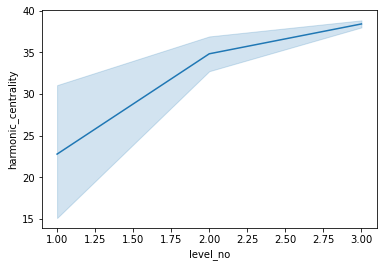

In [ ]:
sns.lineplot(x="level_no", y="harmonic_centrality", data=data)


In [ ]:
# plt.figure(figsize=(12, 12))
# plt.subplot(2,2, 1)  
# sns.pointplot(x="level_no", y="degree_centrality", data=data)
# plt.subplot(2, 2, 2)  
# sns.pointplot(x="level_no", y="closeness_centrality", data=data)
# plt.subplot(2,2, 3)  
# sns.pointplot(x="level_no", y="betweenness_centrality", data=data)
# plt.subplot(2, 2, 4)  
# sns.pointplot(x="level_no", y="age", data=inf)
# plt.show()


In [12]:
inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)

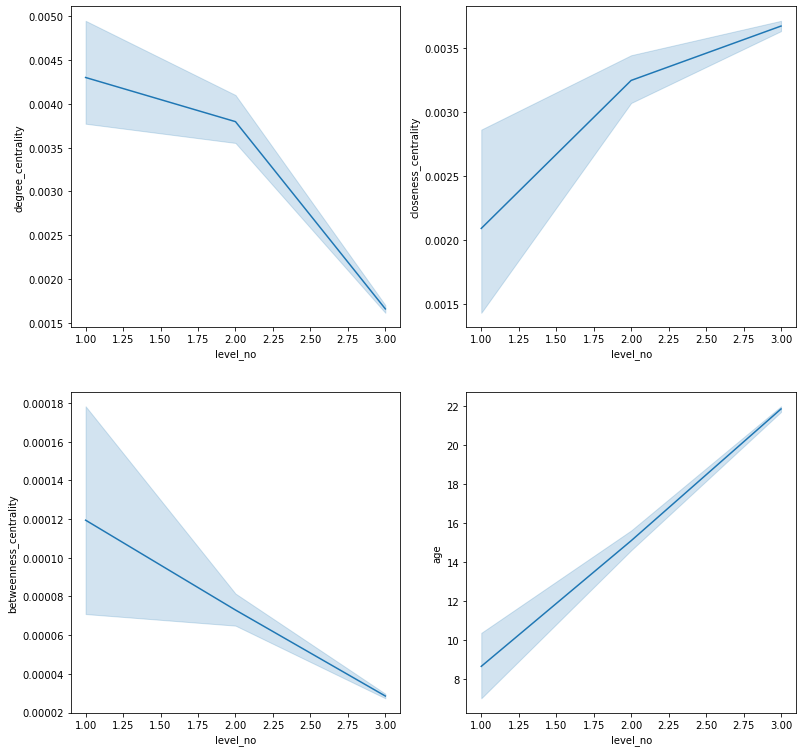

In [ ]:
plt.figure(figsize=(13, 13))
plt.subplot(2, 2, 1)
sns.lineplot(x="level_no", y="degree_centrality", data=data)
plt.subplot(2, 2, 2)
sns.lineplot(x="level_no", y="closeness_centrality", data=data)
plt.subplot(2, 2, 3)
sns.lineplot(x="level_no", y="betweenness_centrality", data=data)
plt.subplot(2, 2, 4)
sns.lineplot(x="level_no", y="age", data=data)
plt.show()

## Graph

### Graph

In [ ]:
class InfoManager:
	def __init__(self, file_path: str = None, df: DataFrame = None) -> None:
		if file_path:
			self.inf: DataFrame = pd.read_csv(file_path)
		elif df is not None:
			self.inf = df

	def get_info_by_uuid(self, id: str) -> List[dict]:
		f = self.inf[self.inf['uuid'] == id]
		return f.to_dict('records')[0]

	def get_info_by_uuidIds(self, ids: List[str]) -> List[dict]:
		f = self.inf[self.inf['uuid'].isin(ids)]
		return f.to_dict('records')

	def get_info_by_key(self, key: str, value: str) -> List[dict]:
		f = self.inf[self.inf[key] == value]
		return f.to_dict('records')

	def get_info_keys_by_uuid(self, id: str, keys: List[str]) -> Dict:
		f = self.inf[self.inf['uuid'] == id]
		return f.iloc[0][keys].to_dict()

	def get_refs_by_uuid(self, uuid: str) -> List[str]:
		f = self.inf[self.inf['parent_paper_uuid'] == uuid]
		return f.to_dict('records')

	def get_parent_info_by_child_id(self, child_id: str) -> List[dict]:
		f = self.inf[self.inf['uuid'] == child_id]
		parent_paper_uuid = f.iloc[0]['parent_paper_uuid']
		p = self.inf[self.inf['uuid'] == parent_paper_uuid]
		return p.to_dict('records')[0]


In [ ]:
class GraphManager:
	def __init__(self) -> None:
		self.adjacencyListUnique: AdjacencyList = defaultdict(list)
		self.adjacencyListActual: AdjacencyList = defaultdict(list)
		self.levelOrderList: Levels = []
		self.levelOrderIdsList: Levels = []
		self.inf: DataFrame|None = None
		self.im: InfoManager|None = None
		

	@classmethod
	def init_from_csv(cls, csv_path: str,) -> GraphManager:
		g = cls()
		g.inf = pd.read_csv(csv_path)
		g.im = InfoManager(df=g.inf)

		print(g.inf.shape)
		for _, row in g.inf.iterrows():
			g.addEdge(row['parent_paper_uuid'], row['uuid'], unique=True)
			g.addEdge(row['parent_paper_id'], row['paper_id'], unique=False)
		return g

	def addEdge(self, parent_paper_uuid: str, child_id: str, unique) -> None:
		if unique:
			self.adjacencyListUnique[parent_paper_uuid].append(child_id)
		else:
			self.adjacencyListActual[parent_paper_uuid].append(child_id)

	def levelOrderFull(self, root: str) -> List[List[Dict]]:
		self.levelOrderList = []
		q: Deque = deque()
		q.append(root)
		while q:
			currentLevel: List[Dict] = []
			currentQLength = len(q)
			for _ in range(currentQLength):
				currentNode = q.popleft()
				# currentLevel.append(currentNode)
				p = self.im.get_info_keys_by_uuid(currentNode, ['uuid', 'parent_paper_uuid','paper_id', 'parent_paper_id'])
				currentLevel.append(p)
				for children in self.adjacencyListUnique[currentNode]:
					q.append(children)

			self.levelOrderList.append(currentLevel)
		
		return self.levelOrderList
	
	def levelOrderIdsOnly(self, root: str) -> List[List[Dict]]:
		self.levelOrderIdsList = []
		q: Deque = deque()
		q.append(root)
		while q:
			currentLevel: List[Dict] = []
			currentQLength = len(q)
			for _ in range(currentQLength):
				currentNode = q.popleft()
				currentLevel.append(currentNode)
				for children in self.adjacencyListUnique[currentNode]:
					q.append(children)

			self.levelOrderIdsList.append(currentLevel)

		return self.levelOrderIdsList
	
	def get_level_no_by_uid(self, levelsOrderList: List[List[Dict]], id: str) -> str:
		for i, l in enumerate(levelsOrderList):
			for d in l:
				if d['uuid'] == id:
					return i
		return "" 

	def get_levels_no_by_paper_id(self, levelsOrderList: List[List[Dict]], id: str) -> List[str]:
		inLevels = []
		for i, l in enumerate(levelsOrderList):
			for d in l:
				if d['paper_id'] == id:
					inLevels.append(i)
		return inLevels
			
	# def alreadyProcessed(self, id: str, levels: List[List[str]]) -> bool:
	# 	print(len(levels))
	# 	for i in range(len(levels) - 1):
	# 		print(i)
	# 		# if id in levels[i]:
	# 		# return True
	
	def getPaths(self, s, d, unique=True) -> List[List[str]]:
		self.path = []
		self.ans = []

		def dfs(root):
			self.path.append(root)
			if root == d:
				if not unique:
					self.ans.append(self.path)
				else:
					self.ans = self.path

				return
			if not unique:
				for child in self.adjacencyListActual[root]:
					dfs(child)
					# after finishing traverse the child node, remove it from current path
					self.path = self.path[:-1]
			else:
				for child in self.adjacencyListUnique[root]:
					dfs(child)
					# after finishing traverse the child node, remove it from current path
					self.path = self.path[:-1]
		dfs(s)

		return self.ans


In [ ]:
# g = Graph.init_from_csv('data/info/info_full_ss.csv')
# g = Graph.init_from_csv('data/info/info_full_ss.csv',read_full=True)
g = GraphManager.init_from_csv('data/info/info_full_ss_new_x.csv')

(24387, 42)


In [ ]:
# g.inf.iloc[1000]

In [ ]:
g.getPaths('8bde6cb8-296d-4593-883f-b768103e1e69',
           'c25fdc24-177a-4155-a288-e26745623089')


['8bde6cb8-296d-4593-883f-b768103e1e69',
 '47dfc1c7-8a74-47b7-8f3c-10783e2f721b',
 'c25fdc24-177a-4155-a288-e26745623089']

In [ ]:
l_full = g.levelOrderFull(root="8bde6cb8-296d-4593-883f-b768103e1e69")
print(f"total levels: {len(l_full)}")
for i, level in enumerate(l_full):
	print(f"level {i}: {len(level)}")

total levels: 5
level 0: 1
level 1: 39
level 2: 1037
level 3: 23249
level 4: 61


In [ ]:
l_full = g.levelOrderIdsOnly(root="8bde6cb8-296d-4593-883f-b768103e1e69")
print(f"total levels: {len(l_full)}")
for i, level in enumerate(l_full):
	print(f"level {i}: {len(level)}")


total levels: 5
level 0: 1
level 1: 39
level 2: 1037
level 3: 23249
level 4: 61


In [ ]:
add_to_pickle('data/info/graph_serialized.dat', g)

In [ ]:
g_serialized = read_from_pickle('data/info/graph_serialized.dat')

In [ ]:
g = GraphManager()
g = g_serialized
g.inf.shape


(24387, 42)

In [ ]:
g.levelOrderList[0][0]['paper_id']

'b0d555a9ea67285fccd2ef8d887907bcc811f67a'

In [ ]:
len(g.levelOrderList)

5

In [ ]:
g.get_levels_no_by_paper_id(levelsOrderList=g.levelOrderList, id="b0d555a9ea67285fccd2ef8d887907bcc811f67a")

[0]

In [ ]:
g.im.get_info_keys_by_uuid(
    "ade6eb61-946a-49f3-835d-74804cb9de3e", ['paper_id','parent_paper_id', 'uuid', 'parent_paper_uuid'])


{'paper_id': '03589e1917debe6df148cac8963fd008e4140237',
 'parent_paper_id': 'b0d555a9ea67285fccd2ef8d887907bcc811f67a',
 'uuid': 'ade6eb61-946a-49f3-835d-74804cb9de3e',
 'parent_paper_uuid': '8bde6cb8-296d-4593-883f-b768103e1e69'}

In [ ]:
print(g.get_levels_no_by_paper_id(
    levelsOrderList=g.levelOrderList, id="03589e1917debe6df148cac8963fd008e4140237")
)


[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Find child older than parent:

In [ ]:
count = []
for i, level in enumerate(l_full):
	# print(f"level {i}: {len(level)}")
	if i == 3:
		break
	for paper in level:
		parent_uuid = paper['parent_paper_uuid']
		if pd.isnull(parent_uuid):
			continue
		root = g.im.get_info_keys_by_uuid(parent_uuid,
									['title', 'uuid', 'paper_id', 'published_date'])
		published_date = root['published_date']
		paper_id = root['paper_id']
		title = root['title']

		refs = g.im.get_refs_by_uuid(parent_uuid)
		for ref in refs:
			child_published_date = ref['published_date']
			child_uuid = ref['uuid']
			child_title = ref['title']
			child_paper_id = ref['paper_id']
			if child_published_date > published_date:
				count.append((i, paper_id, title, child_paper_id,
								child_title, child_published_date))
count


## PDF to TEXT Conversion

In [ ]:
pdf_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".pdf")]
text_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".txt")]

In [ ]:
text_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".txt")]

In [ ]:
os.stat("data/papers/5a4d81c67da140f88de5d8625906a9be17b3af40.txt").st_size


23272

In [ ]:
text_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".txt")]
len(text_files_id_list)

0

In [ ]:
text_yet_to_be_converted =list(set(pdf_files_id_list) - set(text_files_id_list))
len(text_yet_to_be_converted)


334

In [ ]:
text_already_converted = list(
    set(pdf_files_id_list) & set(text_files_id_list))
len(text_already_converted)


7234

In [11]:
from text_pre_process.text_preprocess import cleanText


In [ ]:
dir_name = "data/papers/text_raw/"
files = [f"{dir_name}{f.name}" for f in os.scandir(dir_name) if f.name.endswith(".txt")]
"data/papers/text_raw_clean/"+files[0].split(".")[0].split("/")[-1]+".txt"


'data/papers/text_raw_clean/0000ff68310e8a43c26371b4f0ff05ddaed93577.txt'

In [ ]:
dir_name = "data/papers/text_raw/"
files = [f"{dir_name}{f.name}" for f in os.scandir(dir_name) if f.name.endswith(".txt")]
"data/papers/text_raw_clean/"+files[0].split(".")[0].split("/")[-1]+".txt"


[]

In [ ]:
# !pip install PyMuPDF


In [12]:
import fitz
def pdfToTextWithPyMuPdf(filename):
    text = ""
    with fitz.open(filename) as doc:
        for page in doc:
            text += page.get_text()

    text = cleanText(text,stem=False)
    return text


# 

In [15]:
dir_name = "data/papers/root_raw_clean_without_stem/"
files = [f"{dir_name}{f.name}" for f in os.scandir(
    dir_name) if f.name.endswith(".pdf")]
files

['data/papers/root_raw_clean_without_stem/b0d555a9ea67285fccd2ef8d887907bcc811f67a.pdf']

In [43]:
dir_name + files[0].split(".")[0].split("/")[-1] + ".txt"


'data/papers/new/32448280ef3d03af2fb639bbe1b3709c4bb6c78a.txt'

In [16]:
for file in files:
	clean_text = pdfToTextWithPyMuPdf(file)
	out_file = dir_name + file.split(".")[0].split("/")[-1] + ".txt"
	with open(out_file, "w") as f:
		f.write(clean_text)
	# break

## TeKET

In [164]:
from algorithms import getWeightedKeyPhrasesUsingTeKET,getWeightedKeyPhrasesUsingTopicRank
from pprint import pprint

In [166]:
kp = getWeightedKeyPhrasesUsingTeKET(
    "data/papers/text_demo/b0d555a9ea67285fccd2ef8d887907bcc811f67a-pymupdf-raw.txt")
kp


[('keyphras extract ', 20640),
 ('keyphras ', 11236),
 ('word ', 7744),
 ('document ', 6084),
 ('positionrank ', 5184),
 ('model ', 4900),
 ('unsupervis keyphras extract ', 4628),
 ('research paper ', 3784),
 ('candid word ', 3306),
 ('extract ', 2916),
 ('dataset ', 2916),
 ('author-input keyphras ', 2832),
 ('unsupervis keyphras ', 2728),
 ('paper ', 2704),
 ('posit ', 2704)]

In [ ]:
kp = getWeightedKeyPhrasesUsingTeKET(
    "data/papers/text_demo/b0d555a9ea67285fccd2ef8d887907bcc811f67a-pypdf2-textract-raw.txt")
kp


[('keyphras extract ', 18392),
 ('keyphras ', 10000),
 ('word ', 7744),
 ('document ', 6084),
 ('positionrank ', 4900),
 ('unsupervis keyphras extract ', 4420),
 ('model ', 3600),
 ('candid word ', 3306),
 ('research paper ', 3200),
 ('extract ', 2704),
 ('dataset ', 2704),
 ('author-input keyphras ', 2688),
 ('unsupervis keyphras ', 2596),
 ('target document ', 2352),
 ('paper ', 2304)]

In [156]:
kp = getWeightedKeyPhrasesUsingTeKET(
    "data/papers/text_demo/b0d555a9ea67285fccd2ef8d887907bcc811f67a-pymupdf-clean.txt")
kp


[('word ', 7396),
 ('keyphra ', 6400),
 ('keyphra extract ', 4956),
 ('document ', 4900),
 ('candid word ', 3136),
 ('unsupervi keyphra extract ', 2904),
 ('posit ', 2500),
 ('proceed ', 2304),
 ('research paper ', 2160),
 ('page ', 2116),
 ('dataset ', 1936),
 ('perform baselin ', 1872),
 ('model ', 1764),
 ('paper ', 1764),
 ('target document ', 1720)]

In [142]:
# strip keyphrases
def strip_key_phrases(row):
    if row['key_phrases'] is not None:
        return row['key_phrases'].strip()


df = pd.DataFrame(
    kp, columns=['key_phrases', 'weight'])

df['key_phrases'] = df.apply(strip_key_phrases, axis=1)
# add paper_id column
df.insert(0, 'paper_id', 'b0d555a9ea67285fccd2ef8d887907bcc811f67a')
df

,paper_id,key_phrases,weight
0,b0d555a9ea67285fccd2ef8d887907bcc811f67a,word,7396
1,b0d555a9ea67285fccd2ef8d887907bcc811f67a,keyphra,6400
2,b0d555a9ea67285fccd2ef8d887907bcc811f67a,keyphra extract,4956
3,b0d555a9ea67285fccd2ef8d887907bcc811f67a,document,4900
4,b0d555a9ea67285fccd2ef8d887907bcc811f67a,candid word,3136
5,b0d555a9ea67285fccd2ef8d887907bcc811f67a,unsupervi keyphra extract,2904
6,b0d555a9ea67285fccd2ef8d887907bcc811f67a,posit,2500
7,b0d555a9ea67285fccd2ef8d887907bcc811f67a,proceed,2304
8,b0d555a9ea67285fccd2ef8d887907bcc811f67a,research paper,2160
9,b0d555a9ea67285fccd2ef8d887907bcc811f67a,page,2116


In [143]:
# df.to_csv("data/info/key_phrases_extracted.csv", index=False)


In [27]:
kp = pd.read_csv("data/info/key_phrases_extracted.csv")
already_extracted = kp.paper_id.unique().tolist()
len(already_extracted),already_extracted[:2]


(6818,
 ['1887d7626acf9e277e5ef7657b796d637f11fcf9',
  '26324601f7c25430adbbeec931b28cf11b2dbe81'])

In [28]:
kp[kp['paper_id']=='63e98fe23a54aff6d2d9f5eeb24f54b4fd75d4de']

,paper_id,key_phrases,weight
2375,63e98fe23a54aff6d2d9f5eeb24f54b4fd75d4de,step,808201
2376,63e98fe23a54aff6d2d9f5eeb24f54b4fd75d4de,procedur,262144
2377,63e98fe23a54aff6d2d9f5eeb24f54b4fd75d4de,thi procedur,225368
2378,63e98fe23a54aff6d2d9f5eeb24f54b4fd75d4de,valu,183184
2379,63e98fe23a54aff6d2d9f5eeb24f54b4fd75d4de,comment thi procedur,182736
2380,63e98fe23a54aff6d2d9f5eeb24f54b4fd75d4de,algorithm,133956
2381,63e98fe23a54aff6d2d9f5eeb24f54b4fd75d4de,end,85749
2382,63e98fe23a54aff6d2d9f5eeb24f54b4fd75d4de,comment thi,85560
2383,63e98fe23a54aff6d2d9f5eeb24f54b4fd75d4de,statement,79524
2384,63e98fe23a54aff6d2d9f5eeb24f54b4fd75d4de,thi,76176


In [10]:
kp_info = pd.DataFrame(kp.paper_id.unique().tolist(), columns=['paper_id'])
kp_info


,paper_id
0,1887d7626acf9e277e5ef7657b796d637f11fcf9
1,26324601f7c25430adbbeec931b28cf11b2dbe81
2,04ce064505b1635583fa0d9cc07cac7e9ea993cc
3,03589e1917debe6df148cac8963fd008e4140237
4,1cf65a8c9e9ac8bd1db487004185ad0e15b9b9dd
...,...
6813,af79ed294b890ccae361c8c1ee4ddc157a7deca8
6814,9e7c7853a16a378cc24a082153b282257a9675b7
6815,aa11849871fe719f02c75051c2ff0f9bd3134de1
6816,01e8eb7da1fb0dfe7dd8bf96c3c1c1111558ae1b


In [15]:
# TeKET,TextRank,SingleRank,TopicRank,TopicalPageRank,PositionRank,MultipartiteRank,FirstPhrases,TfIdf,KPMiner,YAKE
kp_info['TeKET'] = 0
kp_info['TextRank'] = 0
kp_info['SingleRank'] = 0
kp_info['TopicRank'] = 0
kp_info['TopicalPageRank'] = 0
kp_info['PositionRank'] = 0
kp_info['MultipartiteRank'] = 0
kp_info['FirstPhrases'] = 0
kp_info['TfIdf'] = 0
kp_info['KPMiner'] = 0
kp_info['YAKE'] = 0
kp_info

,paper_id,TeKET,TextRank,SingleRank,TopicRank,TopicalPageRank,PositionRank,MultipartiteRank,FirstPhrases,TfIdf,KPMiner,YAKE
0,1887d7626acf9e277e5ef7657b796d637f11fcf9,0,0,0,0,0,0,0,0,0,0,0
1,26324601f7c25430adbbeec931b28cf11b2dbe81,0,0,0,0,0,0,0,0,0,0,0
2,04ce064505b1635583fa0d9cc07cac7e9ea993cc,0,0,0,0,0,0,0,0,0,0,0
3,03589e1917debe6df148cac8963fd008e4140237,0,0,0,0,0,0,0,0,0,0,0
4,1cf65a8c9e9ac8bd1db487004185ad0e15b9b9dd,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6813,af79ed294b890ccae361c8c1ee4ddc157a7deca8,0,0,0,0,0,0,0,0,0,0,0
6814,9e7c7853a16a378cc24a082153b282257a9675b7,0,0,0,0,0,0,0,0,0,0,0
6815,aa11849871fe719f02c75051c2ff0f9bd3134de1,0,0,0,0,0,0,0,0,0,0,0
6816,01e8eb7da1fb0dfe7dd8bf96c3c1c1111558ae1b,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
kp_info.to_csv("data/info/keyphrase_done_list.csv", index=False)


In [11]:
text_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".txt")]
len(text_files_id_list)

7235

In [13]:
text_info = pd.DataFrame(text_files_id_list, columns=['paper_id'])
text_info.to_csv("data/info/text_done_list_clean.csv", index=False)

In [29]:
text_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers/text_raw") if f.name.endswith(".txt")]
len(text_files_id_list)


7273

In [36]:
kp  = pd.read_csv("data/info/key_phrases_extracted.csv")

In [35]:
set(kp.paper_id.unique().tolist()) - set(text_files_id_list)


set()

In [10]:
error_list = pd.read_csv("data/info/key_phrases_extraction_error.csv")
error_list = error_list.id.unique().tolist()
len(error_list),error_list[:5]

(445,
 ['2f09d4e27bbf29d009f63fc34317cafedccb9d48',
  '24c5941e64909877b8c6ea05f41aebb6698f290f',
  '8012c4a1e2ca663f1a04e80cbb19631a00cbab27',
  '54e025107a6b2e429357638b867d0452e1978779',
  '22291dcd8b5255b6d0d51a86138ee5bf57b34550'])

In [11]:
len((set(error_list) | set(already_extracted))) # already extracted + error while extracting


7262

In [12]:
processed = (set(error_list) | set(already_extracted)) # already extracted + error list = processed
yet_to_be_extracted = list(set(text_files_id_list) - processed) # total_text - processed = yet to be extracted
len(yet_to_be_extracted),yet_to_be_extracted[:2]


(0, [])

In [17]:
inf = pd.read_csv("data/info/info_full_ss_new_x.csv")
# inf.head(2)
inf = inf[(inf.level_no != 4) ]#& (inf.level_no != 0)
inf.shape


(24326, 42)

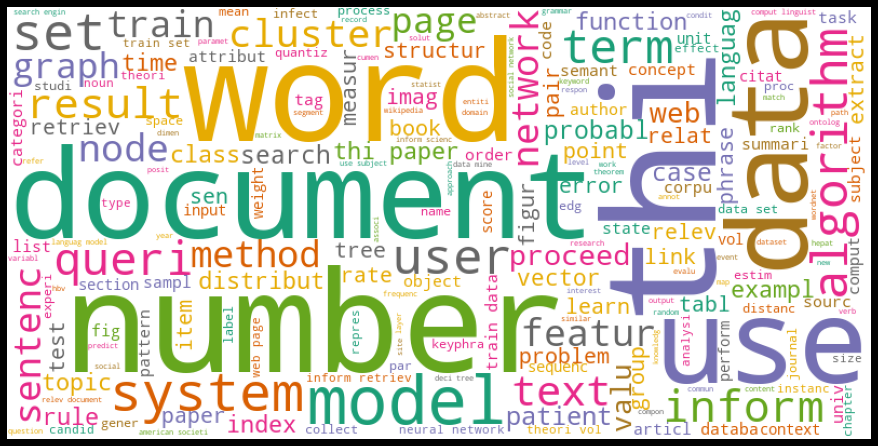

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
w = WordCloud(width=800, height=400, 
              background_color='white', colormap='Dark2').generate_from_frequencies(freq)
plt.figure(figsize=(12, 12), facecolor='k', edgecolor='k')
plt.imshow(w)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


## Main Algorithm

### init

In [41]:
from algorithms import getWeightedKeyPhrasesUsingTeKET, KeyPhrasesManager, get_cosine_similarity, get_jaccard_similarity
from graph.graph_info import GraphManager, InfoManager
from statistics import mean
g_serialized = read_from_pickle('data/info/graph_serialized.dat')
g: GraphManager = GraphManager()
g = g_serialized
g.inf.shape


(24387, 42)

### similarity [random]

In [43]:
km = KeyPhrasesManager("data/info/key_phrases_extracted.csv")
root_paper_key_phrases = km.getKeyPhrasesList(
    "b0d555a9ea67285fccd2ef8d887907bcc811f67a")
root_paper_key_phrases


[('word', 7396),
 ('keyphra', 6400),
 ('keyphra extract', 4956),
 ('document', 4900),
 ('candid word', 3136),
 ('unsupervi keyphra extract', 2904),
 ('posit', 2500),
 ('proceed', 2304),
 ('research paper', 2160),
 ('page', 2116),
 ('dataset', 1936),
 ('perform baselin', 1872),
 ('model', 1764),
 ('paper', 1764),
 ('target document', 1720)]

In [65]:
inf[inf['paper_id']=='26324601f7c25430adbbeec931b28cf11b2dbe81'].shape

(114, 42)

In [66]:
p = km.getKeyPhrasesList('26324601f7c25430adbbeec931b28cf11b2dbe81')
p

[('keyphra', 38416),
 ('document', 13456),
 ('judg', 9604),
 ('individu keyphra', 9592),
 ('noun phrase', 7992),
 ('phrase', 4624),
 ('good keyphra', 4240),
 ('human judg', 3136),
 ('number', 2304),
 ('candid phrase', 1920),
 ('noun', 1600),
 ('extractor', 1296),
 ('set', 1024),
 ('score', 900),
 ('rate', 784)]

In [67]:
p = km.getKeyPhrasesList('26324601f7c25430adbbeec931b28cf11b2dbe81')
get_cosine_similarity(root_paper_key_phrases, p)


0.6133338398687364

In [258]:
root_paper = g.levelOrderList[0][0]
root_paper_id = root_paper['paper_id']
root_paper_uuid = root_paper['uuid']
root_paper_key_phrases = km.getKeyPhrasesList(root_paper_id)
root_paper_info = g.im.get_info_keys_by_uuid(root_paper_uuid, ['title'])

selected_papers = []

for i, level_i in enumerate(g.levelOrderList):
	if i == 0:
		continue
	score_list_level_i = []
	paper_count_in_level_i = len(level_i)
	for paper in level_i:
		paper_id = paper['paper_id']
		paper_uuid = paper['uuid']
		parent_paper_uuid = paper['parent_paper_uuid']
		average_list = []
		
		if not km.isKeyPhraseExist(paper_id):
			# console.log(f"[red]{paper_id} key phrases not exist[/]")
			continue
		paper_key_phrases = km.getKeyPhrasesList(paper_id)
		
		paper_info = g.im.get_info_keys_by_uuid(
			paper_uuid, ['title', 'freshness_avg'])
		parent_paper_id = g.im.get_info_keys_by_uuid(
			parent_paper_uuid, ['paper_id'])['paper_id']
		# cosine similarity between parent and child
		cosine_similarity_with_root = get_cosine_similarity(
			root_paper_key_phrases, paper_key_phrases)
		average_list.append(cosine_similarity_with_root)
		# jaccard similarity between parent and child

		jaccard_similarity_with_root = get_jaccard_similarity(
			root_paper_key_phrases, paper_key_phrases)
		average_list.append(jaccard_similarity_with_root)
		
		if km.isKeyPhraseExist(parent_paper_id):
			parent_paper_key_phrases = km.getKeyPhrasesList(parent_paper_id)		
			# cosine similarity between immediate parent and child
			cosine_similarity_with_immediate_parent = get_cosine_similarity(
				parent_paper_key_phrases, paper_key_phrases)
			average_list.append(cosine_similarity_with_immediate_parent)
			# jaccard similarity between immediate parent and child
			jaccard_similarity_with_immediate_parent = get_jaccard_similarity(
				parent_paper_key_phrases, paper_key_phrases)
			average_list.append(jaccard_similarity_with_immediate_parent)
		
		freshness = paper_info['freshness_avg']
		average_list.append(freshness)
		
		average = mean(average_list)
		print(average_list)
		print(average)
		# print(f"{paper_info['title']} {average_similarity}")
		# score_list_level_i.append(
		# 	{**paper, 'score': average_similarity, 'title': paper_info['title'], 'total_paper_count': paper_count_in_level_i})
		break

	score_list_level_i = sorted(
		score_list_level_i, key=lambda x: x['score'], reverse=True)

	# https://stackoverflow.com/questions/11092511/list-of-unique-dictionaries
	unique_papers_top_n = pd.DataFrame(score_list_level_i).drop_duplicates(subset=['paper_id']).to_dict(
		'records')

	# print(unique_papers_top_n[:2])

	selected_papers.append(unique_papers_top_n)
# pprint(selected_papers)

recommended_papers = [{**root_paper, "title": root_paper_info['title'], 'score': "~", 'total_paper_count':'1', "processed":"1"}]
for i, level_i in enumerate(selected_papers):
	# for paper in level_i:
	score_list_level_i = sorted(
		level_i, key=lambda x: x['score'], reverse=True)
	for paper in score_list_level_i:
		found = list(
			filter(lambda x: x['paper_id'] == paper['paper_id'], recommended_papers))
		# get papers that are not in recommended papers in upper level
		if not found:
			recommended_papers.append({**paper, "processed": len(level_i)})
			break
	
# recommended_papers


[0.6442125339507674, 0.2, 0.6442125339507674, 0.2, 0.512602335]
0.44020548058030695
[0.6781197599425767, 0.2, 0.8948786929888516, 0.2, 0.521797423]
0.49895917518628563
[0.406941430249269, 0.07142857142857142, 0.16038495233071093, 0.1111111111111111, 0.523483388]
0.2546698906239325
[0, 0.0, 0, 0.0, 0.473090939]
0.0946181878


In [4]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.shape


(24387, 31)

In [256]:
root_paper = g.levelOrderList[0][0]
root_paper_id = root_paper['paper_id']
root_paper_uuid = root_paper['uuid']
root_paper_key_phrases = km.getKeyPhrasesList(root_paper_id)
root_paper_key_phrases


[('word', 7396),
 ('keyphra', 6400),
 ('keyphra extract', 4956),
 ('document', 4900),
 ('candid word', 3136),
 ('unsupervi keyphra extract', 2904),
 ('posit', 2500),
 ('proceed', 2304),
 ('research paper', 2160),
 ('page', 2116),
 ('dataset', 1936),
 ('perform baselin', 1872),
 ('model', 1764),
 ('paper', 1764),
 ('target document', 1720)]

In [245]:
inf['similarity_with_root'] = np.nan
inf['similarity_with_immediate_parent'] = np.nan


In [265]:
inf.iloc[10].paper_id

'2a9b20d3467b5f6b5fa7bb4d4dabc36341e0914b'

In [276]:
paper_key_phrases = km.getKeyPhrasesList(
    "26ae952599aa9ba5815a80356024258247fc2b10")
paper_key_phrases


[('data mine practic machin learn tool', 104416),
 ('data mine practic machin learn', 77700),
 ('mine practic machin learn tool', 71300),
 ('practic machin learn tool', 69696),
 ('techniqu chapter', 55696),
 ('data mine practic machin', 54812),
 ('mine practic machin learn', 44896),
 ('practic machin learn', 39204),
 ('machin learn tool', 39204),
 ('data mine practic', 35752),
 ('mine practic machin', 24564),
 ('exampl data mine practic machin learn tool', 22464),
 ('data mine', 20520),
 ('practic machin', 17424),
 ('machin learn', 17424)]

In [23]:
get_cosine_similarity(root_paper_key_phrases, paper_key_phrases)

NameError: name 'root_paper_key_phrases' is not defined

In [285]:

for i, paper in inf.iterrows():
	if i == 0 :
		continue
	paper_id = paper['paper_id']
	paper_uuid = paper['uuid']
	parent_paper_uuid = paper['parent_paper_uuid']
	if not km.isKeyPhraseExist(paper_id):
		continue
	paper_key_phrases = km.getKeyPhrasesList(paper_id)
	cosine_similarity_with_root = get_cosine_similarity(
		root_paper_key_phrases, paper_key_phrases)
	# jaccard_similarity_with_root = get_jaccard_similarity(
    #         root_paper_key_phrases, paper_key_phrases)
	# save to info
	# score1 =  max(cosine_similarity_with_root,jaccard_similarity_with_root)
	inf.loc[inf['uuid'] == paper_uuid,
         "similarity_with_root"] = cosine_similarity_with_root
	
	parent_paper_id = g.im.get_info_keys_by_uuid(
            parent_paper_uuid, ['paper_id'])['paper_id']
	if km.isKeyPhraseExist(parent_paper_id):
		parent_paper_key_phrases = km.getKeyPhrasesList(parent_paper_id)
		cosine_similarity_with_immediate_parent = get_cosine_similarity(
                    parent_paper_key_phrases, paper_key_phrases)
		# jaccard_similarity_with_immediate_parent = get_jaccard_similarity(
        #             parent_paper_key_phrases, paper_key_phrases)
		# score2 = max(cosine_similarity_with_immediate_parent,
		#              jaccard_similarity_with_immediate_parent)
		inf.loc[inf['uuid'] == paper_uuid,
                    "similarity_with_immediate_parent"] = cosine_similarity_with_immediate_parent


### 🔰 Get Path 

In [93]:
root_uid = g.levelOrderList[0][0]['uuid']
for i, paper in inf.iterrows():
	if i == 0:
		continue
	paper_uid = paper['uuid']
	# print(paper_uuid)
	sequential_path = g.getPaths(root_uid, paper_uid, unique=True)
	sequential_path = ";".join(sequential_path)
	inf.loc[inf['uuid'] == paper_uid, "path_from_root"] = sequential_path

In [100]:
inf.iloc[10000].path_from_root.split(";")

['8bde6cb8-296d-4593-883f-b768103e1e69',
 'a2385e05-574d-4d3e-950e-9123496183fe',
 '56a881dd-caf6-4ea8-8753-73ad162d14e4',
 '7e34f546-76f1-46a7-a0f3-d5b02e7d0e3c']

In [41]:
inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)

### 🔰 Get Similarity Scores from immediate parents to root Using Path

In [34]:
dir_name = "data/info/kp_raw_clean_without_stem/"
kp_teket_file_path = dir_name + "key_phrases_extracted.csv"
kp_yake_file_path = dir_name + "key_phrases_extracted_yake.csv"
kp_topicrank_file_path = dir_name + "key_phrases_extracted_topicrank.csv"
kp_tfidf_file_path = dir_name + "key_phrases_extracted_tfidf.csv"
kp_positionrank_file_path = dir_name + "key_phrases_extracted_position_rank.csv"
# kp_multipartiterank_file_path = dir_name+"key_phrases_extracted_multipartiterank.csv"

kp_done = pd.read_csv(dir_name + "keyphrase_done_list.csv")

kp_teket = pd.read_csv(kp_teket_file_path)
kp_yake = pd.read_csv(kp_yake_file_path)
kp_topicrank = pd.read_csv(kp_topicrank_file_path)
kp_tfidf = pd.read_csv(kp_tfidf_file_path)
kp_positionrank = pd.read_csv(kp_positionrank_file_path)


In [68]:
len(kp_teket['paper_id'].unique().tolist())


6822

In [69]:
len(kp_yake['paper_id'].unique().tolist()),len(kp_topicrank['paper_id'].unique().tolist()),len(kp_tfidf['paper_id'].unique().tolist()),len(kp_positionrank['paper_id'].unique().tolist())


(6822, 6820, 6822, 6821)

In [19]:
km = KeyPhrasesManager(kp_teket_file_path)
root_paper_key_phrases = km.getKeyPhrasesList(
    "b0d555a9ea67285fccd2ef8d887907bcc811f67a")
root_paper_key_phrases


[('word', 12100),
 ('keyphras extract', 10212),
 ('keyphras', 9604),
 ('document', 6724),
 ('unsupervis keyphras extract', 5440),
 ('candid word', 4970),
 ('research paper', 4128),
 ('model', 3844),
 ('posit', 3364),
 ('unsupervis keyphras', 3240),
 ('page', 3136),
 ('paper', 2916),
 ('target document', 2856),
 ('inform retriev', 2700),
 ('extract', 2500)]

In [5]:
km = KeyPhrasesManager("data/info/key_phrases_extracted.csv")
root_paper_key_phrases = km.getKeyPhrasesList(
    "b0d555a9ea67285fccd2ef8d887907bcc811f67a")
root_paper_key_phrases


[('word', 7396),
 ('keyphra', 6400),
 ('keyphra extract', 4956),
 ('document', 4900),
 ('candid word', 3136),
 ('unsupervi keyphra extract', 2904),
 ('posit', 2500),
 ('proceed', 2304),
 ('research paper', 2160),
 ('page', 2116),
 ('dataset', 1936),
 ('perform baselin', 1872),
 ('model', 1764),
 ('paper', 1764),
 ('target document', 1720)]

In [105]:
p = km.getKeyPhrasesList('26324601f7c25430adbbeec931b28cf11b2dbe81')
p

[('keyphra', 38416),
 ('document', 13456),
 ('judg', 9604),
 ('individu keyphra', 9592),
 ('noun phrase', 7992),
 ('phrase', 4624),
 ('good keyphra', 4240),
 ('human judg', 3136),
 ('number', 2304),
 ('candid phrase', 1920),
 ('noun', 1600),
 ('extractor', 1296),
 ('set', 1024),
 ('score', 900),
 ('rate', 784)]

In [116]:
p = km.getKeyPhrasesList('26324601f7c25430adbbeec931b28cf11b2dbe81')
get_cosine_similarity(root_paper_key_phrases, p)


0.6245980255360323

In [117]:
km = KeyPhrasesManager("data/info/key_phrases_extracted_tfidf.csv")
root_paper_key_phrases = km.getKeyPhrasesList(
    "b0d555a9ea67285fccd2ef8d887907bcc811f67a")
p = km.getKeyPhrasesList('26324601f7c25430adbbeec931b28cf11b2dbe81')
get_cosine_similarity(root_paper_key_phrases, p)


0.8174537932889596

In [119]:
km = KeyPhrasesManager("data/info/key_phrases_extracted_topicrank.csv")
root_paper_key_phrases = km.getKeyPhrasesList(
    "b0d555a9ea67285fccd2ef8d887907bcc811f67a")
p = km.getKeyPhrasesList('26324601f7c25430adbbeec931b28cf11b2dbe81')
get_cosine_similarity(root_paper_key_phrases, p,isNormalized=True)


0.8461671838663758

In [60]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.columns


Index(['paper_id', 'uuid', 'parent_paper_uuid', 'parent_paper_id', 'title',
       'level_no', 'multiple_appearances_in_levels_count',
       'multiple_appearances_in_levels', 'path_from_root', 'reference_count',
       'citation_count', 'influential_citation_count', 'published_date',
       'paper_type', 'venue', 'isOpenAccess', 'abstract', 'paper_link', 'doi',
       'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'influence_score',
       'similarity_with_level_0_parent', 'similarity_with_immediate_parent',
       'similarity_with_level_1_parent', 'similarity_with_level_2_parent',
       'similarity_with_level_0_parent_em',
       'similarity_with_level_1_parent_em',
       'similarity_with_level_2_parent_em',
       'similarity_with_immediate_parent_em', 'in_deg_centrality',
       'out_deg_centrality', 'degree_centrality', 'closeness_centrality',
       'betweenness_centrality', 'eigenvector_centrality', 'load_centrality',
   

In [65]:
inf.drop(['similarity_with_level_0_parent', 'similarity_with_immediate_parent',
'similarity_with_level_1_parent', 'similarity_with_level_2_parent',], axis=1, inplace=True)


In [42]:
def calculate_similarity(km, algorithm, isNormalized):

	similarity_with_l0th_parent = f"similarity_with_l0th_parent_{algorithm}"
	similarity_with_l1th_parent = f"similarity_with_l1th_parent_{algorithm}"
	similarity_with_l2th_parent = f"similarity_with_l2th_parent_{algorithm}"
	
	inf[similarity_with_l0th_parent] = np.nan
	inf[similarity_with_l1th_parent] = np.nan
	inf[similarity_with_l2th_parent] = np.nan

	for i, paper in inf.iterrows():
		if i == 0:
			continue
		paper_id = paper['paper_id']
		paper_uuid = paper['uuid']
		
		paper_key_phrases = km.getKeyPhrasesList(paper_id)
		if not km.isKeyPhraseExist(paper_id):
			continue
		papers_from_root = paper['path_from_root'].split(";") # getPaths Equivalent
		papers_from_root_till_immediate_parent = papers_from_root[:-1]
		for i, level_ith_parent_uid in enumerate(papers_from_root_till_immediate_parent):
			if i > 2:
				break
			level_ith_parent_paper_id = g.im.get_info_keys_by_uuid(level_ith_parent_uid, ['paper_id'])['paper_id']
			if km.isKeyPhraseExist(level_ith_parent_paper_id):
				u = km.getKeyPhrasesList(level_ith_parent_paper_id)
				cosine_similarity = get_cosine_similarity(
					u, paper_key_phrases, isNormalized)
				if i == 0:
					inf.loc[inf['uuid'] == paper_uuid,
										similarity_with_l0th_parent] = cosine_similarity
				elif i == 1:
					inf.loc[inf['uuid'] == paper_uuid,
										similarity_with_l1th_parent] = cosine_similarity
				elif i == 2:
					inf.loc[inf['uuid'] == paper_uuid,
										similarity_with_l2th_parent] = cosine_similarity


In [28]:
km = KeyPhrasesManager(kp_topicrank_file_path)
calculate_similarity(km, "topicrank", isNormalized=True)


In [29]:
km = KeyPhrasesManager(kp_positionrank_file_path)
calculate_similarity(km, "position_rank",isNormalized=True)

In [30]:
km = KeyPhrasesManager(kp_yake_file_path)
calculate_similarity(km, "yake",isNormalized=True)

In [67]:
km = KeyPhrasesManager(kp_teket_file_path)
calculate_similarity(km, "teket",isNormalized=False)

In [32]:
km = KeyPhrasesManager(kp_tfidf_file_path)
calculate_similarity(km, "tfidf", isNormalized=False)


In [35]:
# cols = ['level_no', 'similarity_with_l0_teket', 'similarity_with_l1_teket',
#         'similarity_with_l2_teket', 'similarity_with_l0th_parent_topicrank',
#         'similarity_with_l1th_parent_topicrank',
#         'similarity_with_l2th_parent_topicrank']
cols_0 = ['level_no', 'similarity_with_l0th_parent_teket',
        'similarity_with_l0th_parent_topicrank',
          'similarity_with_l0th_parent_yake',
          'similarity_with_l0th_parent_position_rank',
          'similarity_with_l0th_parent_tfidf'
          ]
data = inf[cols_0]

data = data[data['level_no'].isin([1, 2, 3])]
data

,level_no,similarity_with_l0th_parent_teket,similarity_with_l0th_parent_topicrank,similarity_with_l0th_parent_yake,similarity_with_l0th_parent_position_rank,similarity_with_l0th_parent_tfidf
1,1,0.648859,0.913726,0.928682,0.845059,0.890978
2,1,0.579223,0.813792,0.861148,0.641488,0.865960
3,1,0.040953,0.958313,0.894119,0.993596,0.000000
4,1,0.680234,0.887000,0.914983,0.885055,0.895932
5,1,0.658666,0.934955,0.916081,0.949229,0.878882
...,...,...,...,...,...,...
24321,3,NaN,NaN,NaN,NaN,NaN
24322,3,0.000000,0.958313,0.931005,0.993596,0.000000
24323,3,NaN,NaN,NaN,NaN,NaN
24324,3,0.000000,0.958313,0.931005,0.993596,0.000000


<AxesSubplot:xlabel='similarities', ylabel='score'>

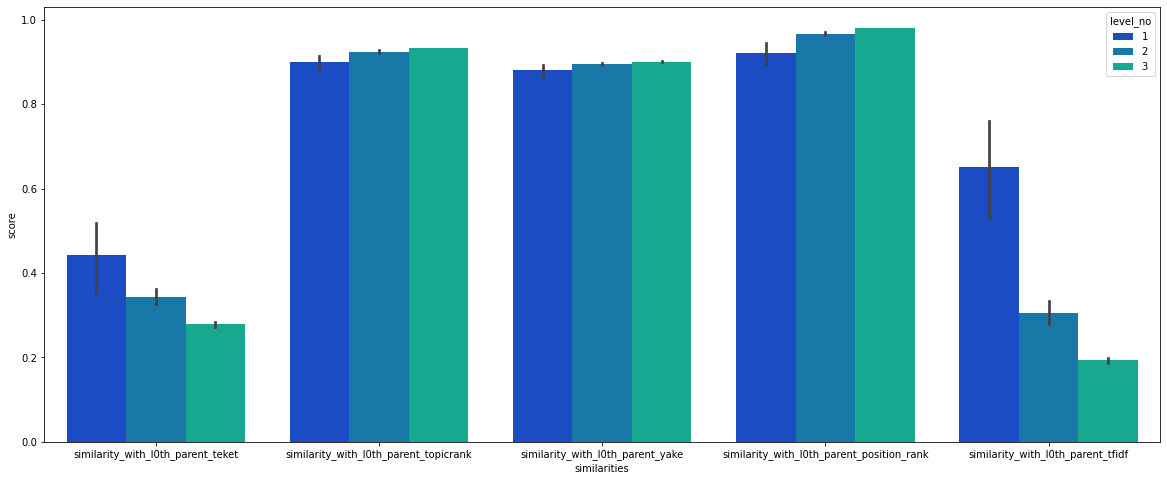

In [36]:
data = data.melt(
    'level_no', var_name='similarities', value_name='score')
plt.figure(figsize=(20, 8))
sns.barplot(data=data, x="similarities", y="score",
            hue='level_no', palette="winter")


In [142]:
# inf.to_csv('data/info/info_full_v1.csv', index=False)

### with embedding

In [26]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.columns


Index(['uuid', 'paper_id', 'parent_paper_uuid', 'parent_paper_id', 'title',
       'reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
       'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'degree_centrality',
       'closeness_centrality', 'betweenness_centrality', 'level_no',
       'similarity_with_l0', 'similarity_with_immediate_parent',
       'paper_type_label', 'path_from_root', 'similarity_with_l1',
       'similarity_with_l2', 'similarity_with_l0_em', 'similarity_with_l1_em',
       'similarity_with_l2_em', 'similarity_with_immediate_parent_em',
       'influence_score', 'in_deg_centrality', 'out_deg_centrality',
       'eigenvector_centrality', 'load_centrality',
       'citation_count_standard_norm', 'age_standard_norm'],
      dtype='object')

In [4]:
root = inf.iloc[0]['embedding'].split(':')[1].split(",")[:-1]
# root = [float(i) for i in root if i != ""]
root[:5]

['-3.3292479515075684',
 '-1.6170390844345093',
 '-0.41584455966949463',
 '2.3501198291778564',
 '-0.5364987850189209']

In [5]:
p1 = inf.iloc[1]['embedding'].split(':')[1].split(",")[:-1]
# p1 = [float(i) for i in p1 if i !='']


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(np.array([root]),np.array([p1]))

array([[0.72775035]])

In [7]:
inf.iloc[1]['similarity_with_l0']

0.6442125339507674

In [8]:
inf['embedding'].isnull().sum()


0

In [9]:
pd.isna(inf.iloc[1]['embedding'])


False

In [10]:
inf['similarity_with_l0_em'] = np.nan
inf['similarity_with_l1_em'] = np.nan
inf['similarity_with_l2_em'] = np.nan


In [14]:

for i, paper in inf.iterrows():
	if i == 0:
		continue
	# if  i>10:
	# 	break
	paper_id = paper['paper_id']
	paper_uuid = paper['uuid']
	paper_embedding = paper['embedding']
	if pd.isna(paper_embedding):
		continue
	paper_embedding = paper_embedding.split(':')[1].split(",")[:-1]
	
	# !!!
	papers_from_root = paper['path_from_root'].split(";")
	papers_from_root_till_immediate_parent = papers_from_root[:-1]
	
	for i, level_ith_parent_uid in enumerate(papers_from_root_till_immediate_parent):
	# !!!
		if i > 2:
			break
		level_ith_parent_info = g.im.get_info_keys_by_uuid(
			level_ith_parent_uid, ['paper_id','embedding'])
		level_ith_parent_paper_embedding = level_ith_parent_info['embedding']
		# level_ith_parent_paper_id = level_ith_parent_info['paper_id']
		if not pd.isna(level_ith_parent_paper_embedding):
			p_parents_em = level_ith_parent_paper_embedding.split(':')[
						1].split(",")[:-1]
			s = cosine_similarity(np.array([p_parents_em]), np.array([paper_embedding]))[0][0]
			if i == 0:
				inf.loc[inf['uuid'] == paper_uuid,"similarity_with_l0_em"] = s
			elif i == 1:
				inf.loc[inf['uuid'] == paper_uuid,"similarity_with_l1_em"] = s
			elif i == 2:
				inf.loc[inf['uuid'] == paper_uuid,"similarity_with_l2_em"] = s


In [ ]:
inf[inf['similarity_with_l0_em']]


In [28]:
inf['similarity_with_immediate_parent_em'] = np.nan


In [34]:
for i, paper in inf.iterrows():
	if i == 0:
		continue
	# if  i>100:
	# 	break
	paper_id = paper['paper_id']
	paper_uuid = paper['uuid']
	parent_paper_uuid = paper['parent_paper_uuid']
	paper_embedding = paper['embedding']
	if pd.isna(paper_embedding):
		continue
	paper_embedding = paper_embedding.split(':')[1].split(",")[:-1]

	parent_paper_info = g.im.get_info_keys_by_uuid(
            parent_paper_uuid, ['paper_id','embedding'])
	parent_paper_id =parent_paper_info['paper_id']
	parent_paper_embedding = parent_paper_info[ 'embedding']
	parent_paper_embedding = parent_paper_embedding.split(':')[
    1].split(",")[:-1]
	s = cosine_similarity(np.array([p_parents_em]), np.array([paper_embedding]))[0][0]
	inf.loc[inf['uuid'] == paper_uuid,
                    "similarity_with_immediate_parent_em"] = s


In [138]:
inf.drop(['similarity_with_l3'], axis=1, inplace=True)


In [73]:
inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)

## Random

In [13]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.shape,inf.columns


((24387, 42),
 Index(['uuid', 'paper_id', 'parent_paper_uuid', 'parent_paper_id', 'title',
        'reference_count', 'citation_count', 'influential_citation_count',
        'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
        'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
        'citation_count_min_max_norm', 'age_min_max_norm', 'degree_centrality',
        'closeness_centrality', 'betweenness_centrality', 'level_no',
        'similarity_with_l0', 'similarity_with_immediate_parent',
        'paper_type_label', 'path_from_root', 'similarity_with_l1',
        'similarity_with_l2', 'similarity_with_l0_em', 'similarity_with_l1_em',
        'similarity_with_l2_em', 'similarity_with_immediate_parent_em',
        'influence_score', 'in_deg_centrality', 'out_deg_centrality',
        'eigenvector_centrality', 'load_centrality',
        'citation_count_standard_norm', 'age_standard_norm'],
       dtype='object'))

In [ ]:
papers = inf['paper_id'].unique().tolist()
papers_df = pd.DataFrame(papers, columns=['paper_id'])
papers_df.to_csv('data/info/papers.csv', index=False)


In [3]:
level_1 = inf[inf['level_no']==1]
level_1_papers = level_1['paper_id'].unique().tolist()
level_2 = inf[inf['level_no']==2]
level_2_papers = level_2['paper_id'].unique().tolist()
level_3 = inf[inf['level_no']==3]
level_3_papers = level_3['paper_id'].unique().tolist()


In [35]:
level_1_papers_df = pd.DataFrame(level_1_papers, columns=['paper_id'])
print(level_1_papers_df.shape)
level_2_papers_df = pd.DataFrame(level_2_papers, columns=['paper_id'])
print(level_2_papers_df.shape)
level_3_papers_df = pd.DataFrame(level_3_papers, columns=['paper_id'])
print(level_3_papers_df.shape)
level_1_papers_df.to_csv('data/info/level_1_papers.csv', index=False)
level_2_papers_df.to_csv('data/info/level_2_papers.csv', index=False)
level_3_papers_df.to_csv('data/info/level_3_papers.csv', index=False)

(39, 1)
(627, 1)
(9172, 1)


In [46]:
text_files = [f.name.split(".")[0] for f in os.scandir(
    'data/papers/text_raw_clean') if f.name.endswith('.txt')]
len(text_files), text_files[:2]

(7273,
 ['0000ff68310e8a43c26371b4f0ff05ddaed93577',
  '0005a4d98ba8ccf0eb944a1a36adadcede25e7f8'])

In [50]:
# copy file from one dir to another
import shutil
for file in text_files:
	if file in level_3_papers:
		shutil.copy(f'data/papers/text_raw_clean/{file}.txt',
		            'data/papers/level_3_raw_clean_without_stem/')
		

In [4]:
level_1_raw_clean_without_stem = [f.name.split(".")[0] for f in os.scandir(
    'data/papers/level_1_raw_clean_without_stem') if f.name.endswith('.txt')]
len(level_1_raw_clean_without_stem), level_1_raw_clean_without_stem[:2]


(33,
 ['03589e1917debe6df148cac8963fd008e4140237',
  '05dec9ff0f48f45b09245ba0354748961f18ff77'])

In [7]:
set(level_1_papers) - set(level_1_raw_clean_without_stem)


{'32448280ef3d03af2fb639bbe1b3709c4bb6c78a',
 'a011209e0628633b60223311797bc29c3a6902f8',
 'b62222ceaf242b0560a3dd1e5631bdb326c9b346',
 'bd3794c777af5ba363abae5708050ea78ecc97e2',
 'f7fe3f870ef5e1a74600c8808c07732cd2e5142d',
 'ff30cca624b6a64d561310f564873a63fb413ef1'}

In [6]:
level_2_raw_clean_without_stem = [f.name.split(".")[0] for f in os.scandir(
    'data/papers/level_2_raw_clean_without_stem') if f.name.endswith('.txt')]
len(level_2_raw_clean_without_stem), level_2_raw_clean_without_stem[:2]


(467,
 ['00311d4a5ed649f720589a580c38d4035bfc65ea',
  '006b8c5d5b38e8a07091b5b001ece6db1d2b132e'])

In [10]:
level_3_raw_clean_without_stem = [f.name.split(".")[0] for f in os.scandir(
    'data/papers/level_3_raw_clean_without_stem') if f.name.endswith('.txt')]
len(level_3_raw_clean_without_stem), level_3_raw_clean_without_stem[:2]


(6703,
 ['0000ff68310e8a43c26371b4f0ff05ddaed93577',
  '0005a4d98ba8ccf0eb944a1a36adadcede25e7f8'])

In [4]:
common = list(set(level_3_raw_clean_without_stem) & set(level_1_raw_clean_without_stem))
len(common)


475

In [19]:
# remove all common papers from level_3_raw_clean_without_stem
for file in common:
	os.remove(f'data/papers/level_3_raw_clean_without_stem/{file}.txt')


In [11]:
raw_clean_without_stem = [f.name.split(".")[0] for f in os.scandir(
    'data/papers/text_raw_clean_without_stem') if f.name.endswith('.txt')]
len(raw_clean_without_stem), raw_clean_without_stem[:2]


(7273,
 ['0000ff68310e8a43c26371b4f0ff05ddaed93577',
  '0005a4d98ba8ccf0eb944a1a36adadcede25e7f8'])

In [9]:
len(set(level_3_raw_clean_without_stem))


7273

In [6]:
dir_name = "data/info/kp_raw_clean_without_stem/"
kp_teket_file_path = dir_name + "key_phrases_extracted.csv"
kp_yake_file_path = dir_name + "key_phrases_extracted_yake.csv"
kp_topicrank_file_path = dir_name + "key_phrases_extracted_topicrank.csv"
kp_tfidf_file_path = dir_name + "key_phrases_extracted_tfidf.csv"
kp_positionrank_file_path = dir_name + "key_phrases_extracted_position_rank.csv"
# kp_multipartiterank_file_path = dir_name+"key_phrases_extracted_multipartiterank.csv"


kp_teket = pd.read_csv(kp_teket_file_path)
kp_yake = pd.read_csv(kp_yake_file_path)
kp_topicrank = pd.read_csv(kp_topicrank_file_path)
kp_tfidf = pd.read_csv(kp_tfidf_file_path)
kp_positionrank = pd.read_csv(kp_positionrank_file_path)


In [12]:
len(kp_positionrank.paper_id.unique().tolist())


1124

In [22]:
papers = inf.paper_id.unique().tolist()
len(papers)


9269

In [24]:
papers_data = []
for i in papers:
	levels = g.get_levels_no_by_paper_id(levelsOrderList=g.levelOrderList, id=i)
	duplicate_count = len(levels)
	levels_str = ",".join([str(p) for p in levels])
	papers_data.append({"paper_id": i,"duplicate_count": duplicate_count,"levels": levels_str})
	break

level_1_papers_df = pd.DataFrame(papers_data)
print(level_1_papers_df.shape)
level_1_papers_df.head()


(1, 3)


,paper_id,duplicate_count,levels
0,b0d555a9ea67285fccd2ef8d887907bcc811f67a,1,0
